###K-Means Clustering & Elbow Method

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


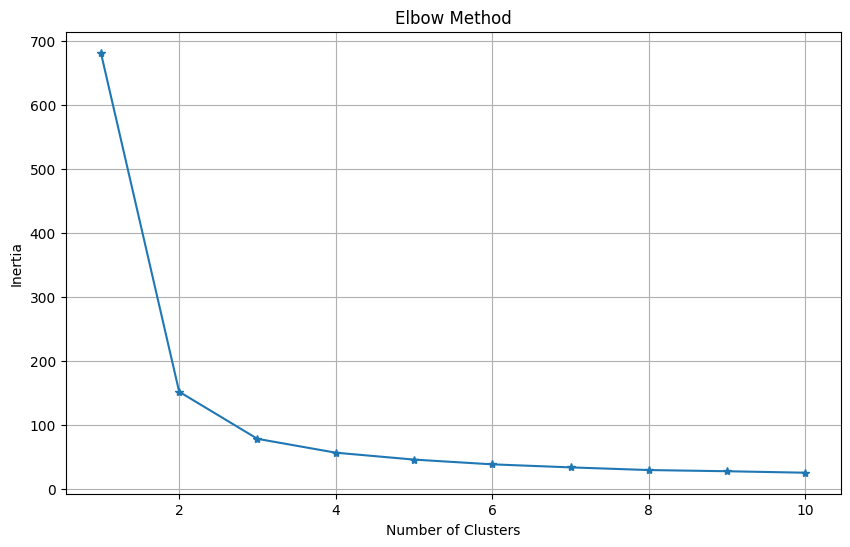

In [ ]:
from types import new_class
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x=iris.data
loop=[]
n=range(1,11)
for k in n:
  kmode=KMeans(n_clusters=k,random_state=42,n_init=10)
  kmode.fit(x)
  loop.append(kmode.inertia_)

plt.figure(figsize=(10,6))
plt.plot(n,loop,marker="*")
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
km=KMeans(n_clusters=3,random_state=42,n_init=10)
label_km=km.fit_predict(x)

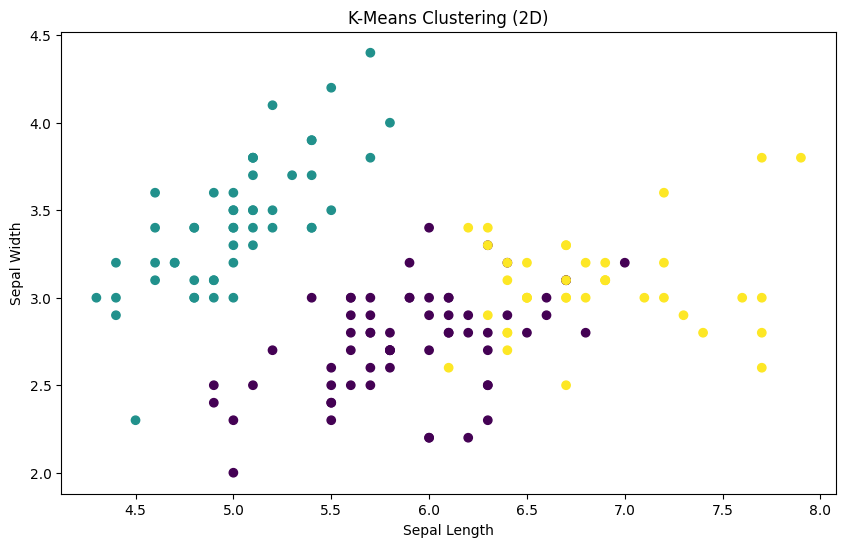

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=label_km)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering (2D)")
plt.show()

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
df["cluster"] = label_km
pd.crosstab(label_km, df["target"])

target,0,1,2
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


###PCA (Principal Component Analysis)

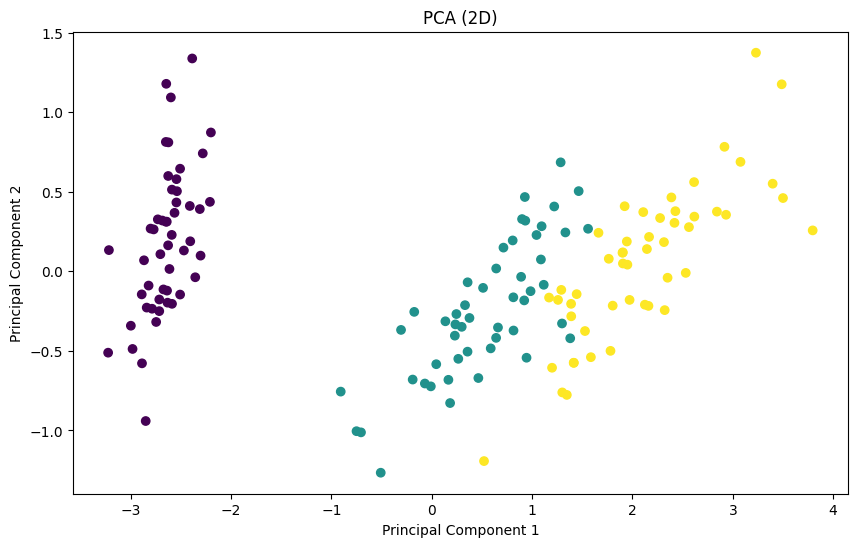

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca1=pca.fit_transform(x)


plt.figure(figsize=(10,6))
plt.scatter(pca1[:,0],pca1[:,1],c=df['target'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2D)")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
kpca=KMeans(n_clusters=3,random_state=42,n_init=10)
label_kpca=kpca.fit_predict(pca1)

pd.crosstab(label_kpca,df["target"])

target,0,1,2
row_0,,,
0,0,3,36
1,50,0,0
2,0,47,14


###Hierarchical Clustering

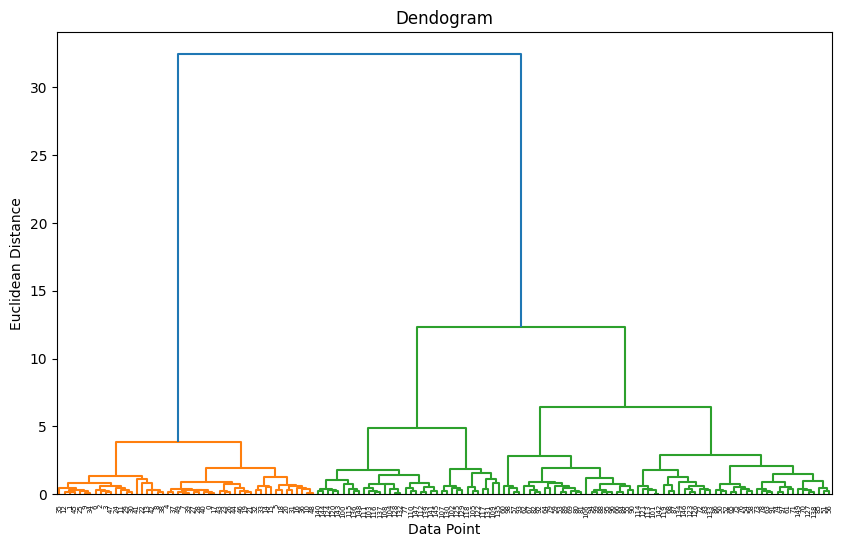

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

linked=linkage(x,method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.xlabel("Data Point")
plt.ylabel("Euclidean Distance")
plt.title("Dendogram")
plt.show()

In [ ]:
hc_labels = fcluster(linked, t=6, criterion='maxclust')
pd.crosstab(hc_labels, df["target"])

target,0,1,2
row_0,,,
1,21,0,0
2,29,0,0
3,0,1,23
4,0,0,12
5,0,25,1
6,0,24,14


###DBSCAN

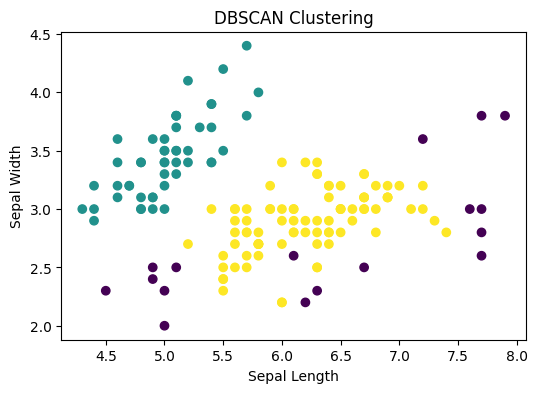

In [ ]:
from sklearn.cluster import DBSCAN

Db=DBSCAN(eps=0.5,min_samples=5)
label_db=Db.fit_predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=label_db )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("DBSCAN Clustering")
plt.show()


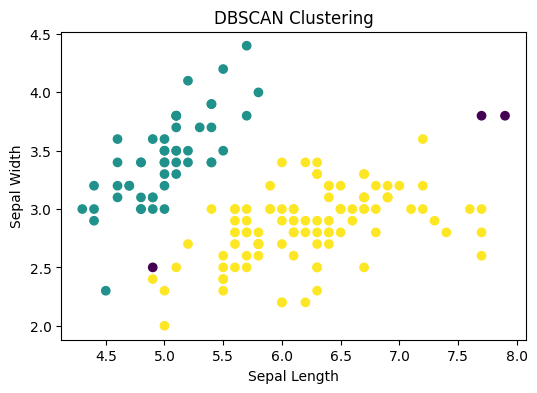

In [ ]:
Db=DBSCAN(eps=0.7,min_samples=3)
label_db=Db.fit_predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=label_db )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("DBSCAN Clustering")
plt.show()


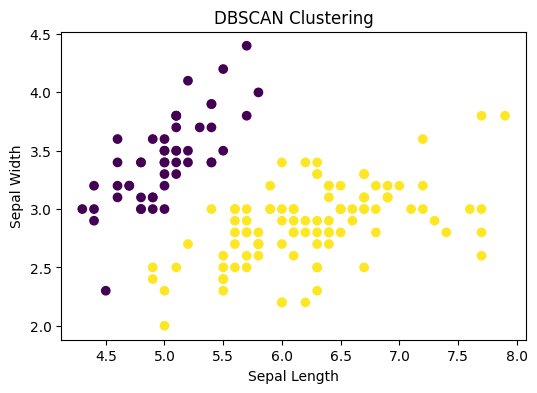

In [ ]:
Db=DBSCAN(eps=1.0,min_samples=5)
label_db=Db.fit_predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1], c=label_db )
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
pd.crosstab(label_db,label_km)

col_0,0,1,2
row_0,,,
0,0,50,0
1,62,0,38
